Prefix: 186.90.32.1, Percentage of AS Path Changed: 9.09%
Prefix: 190.74.32.1, Percentage of AS Path Changed: 36.36%
Prefix: 200.44.116.132, Percentage of AS Path Changed: 8.33%
Prefix: 190.203.64.1, Percentage of AS Path Changed: 27.27%
Prefix: 201.248.128.1, Percentage of AS Path Changed: 0.00%
Prefix: 190.202.129.89, Percentage of AS Path Changed: 20.00%
Prefix: 190.205.44.233, Percentage of AS Path Changed: 8.33%
Prefix: 190.202.69.233, Percentage of AS Path Changed: 25.00%
Prefix: 190.202.96.1, Percentage of AS Path Changed: 12.50%
Prefix: 201.249.90.102, Percentage of AS Path Changed: 27.27%
Prefix: 190.78.40.219, Percentage of AS Path Changed: 0.00%
Prefix: 200.11.191.126, Percentage of AS Path Changed: 10.00%
Prefix: 190.77.100.14, Percentage of AS Path Changed: 18.18%
Prefix: 190.201.139.5, Percentage of AS Path Changed: 11.11%
Prefix: 200.11.146.1, Percentage of AS Path Changed: 12.50%
Prefix: 190.36.192.1, Percentage of AS Path Changed: 0.00%
Prefix: 186.95.127.127, Percenta

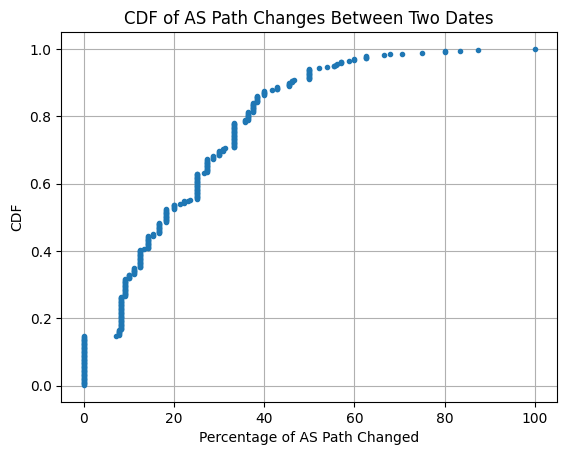

In [3]:
import os
import json
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

def process_file(file_path):
    """Process each JSON file and collect AS paths for each prefix."""
    prefix_paths = defaultdict(list)
    with open(file_path, 'r') as file:
        for line in file:
            try:
                entry = json.loads(line)
                if 'as_path' in entry:
                    prefix = entry["dest"]["ip"]
                    as_path = entry['as_path']
                    prefix_paths[prefix].append(as_path)
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON from file {file_path}: {e}")
    return prefix_paths

def calculate_as_path_changes(prefix_paths1, prefix_paths2):
    """Calculate the percentage of AS path change for each prefix between two datasets."""
    change_percentages = {}
    common_prefixes = set(prefix_paths1.keys()) & set(prefix_paths2.keys())
    for prefix in common_prefixes:
        paths1 = prefix_paths1[prefix]
        paths2 = prefix_paths2[prefix]
        
        # For each prefix, compare the AS paths from both datasets
        # We'll compare the first AS path from each dataset for simplicity
        as_path1 = paths1[0]
        as_path2 = paths2[0]
        
        # Calculate the total number of AS hops (positions)
        total_hops = max(len(as_path1), len(as_path2))
        
        # Count the number of positions where AS numbers are different
        differences = sum(1 for i in range(min(len(as_path1), len(as_path2))) if as_path1[i] != as_path2[i])
        # Add the difference in length (if any) to the differences
        differences += abs(len(as_path1) - len(as_path2))
        
        # Calculate the percentage of the AS path that has changed
        percentage_change = (differences / total_hops) * 100 if total_hops > 0 else 0
        change_percentages[prefix] = percentage_change
    return change_percentages

def plot_cdf(change_percentages):
    """Plot the CDF of the percentage changes."""
    percentages = sorted(change_percentages.values())
    cdf = np.arange(1, len(percentages)+1) / float(len(percentages))
    plt.plot(percentages, cdf, marker='.', linestyle='none')
    plt.xlabel('Percentage of AS Path Changed')
    plt.ylabel('CDF')
    plt.title('CDF of AS Path Changes Between Two Dates')
    plt.grid(True)
    plt.show()

# Main execution
if __name__ == "__main__":
    base_path = "../result/vene" 
    target = 8048
    # Define the two dates to compare
    date1 = "September-01-00-14"
    date2 = "September-03-08-15"  # Change as needed

    file1 = os.path.join(base_path, date1, f"{target}.json")
    file2 = os.path.join(base_path, date2, f"{target}.json")

    # Process both files to get AS paths per prefix
    prefix_paths1 = process_file(file1)
    prefix_paths2 = process_file(file2)

    # Calculate percentage of AS path changes
    change_percentages = calculate_as_path_changes(prefix_paths1, prefix_paths2)

    # Print the change percentages for each prefix
    for prefix, pct_change in change_percentages.items():
        print(f"Prefix: {prefix}, Percentage of AS Path Changed: {pct_change:.2f}%")

    # Plot the CDF
    plot_cdf(change_percentages)

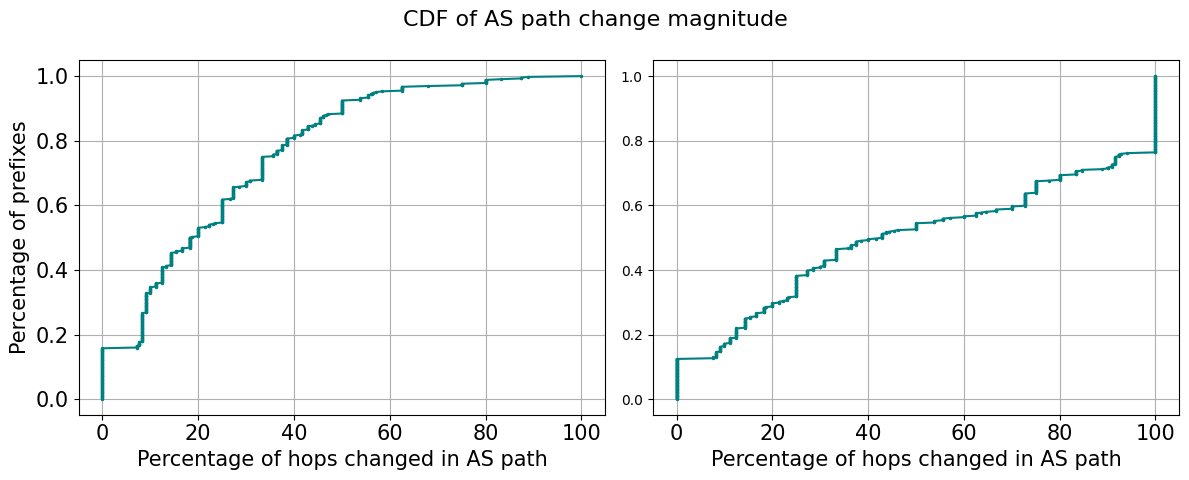

In [36]:
import os
import json
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

def process_file(file_path):
    """Process each JSON file and collect AS paths for each prefix."""
    prefix_paths = defaultdict(list)
    with open(file_path, 'r') as file:
        for line in file:
            try:
                entry = json.loads(line)
                if 'as_path' in entry:
                    prefix = entry["dest"]["ip"]
                    as_path = entry['as_path']
                    prefix_paths[prefix].append(as_path)
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON from file {file_path}: {e}")
    return prefix_paths

def calculate_as_path_changes(prefix_paths1, prefix_paths2):
    """Calculate the percentage of AS path change for each prefix between two datasets."""
    change_percentages = {}
    common_prefixes = set(prefix_paths1.keys()) & set(prefix_paths2.keys())
    for prefix in common_prefixes:
        paths1 = prefix_paths1[prefix]
        paths2 = prefix_paths2[prefix]
        

        # For each prefix, compare the AS paths from both datasets
        # We'll compare the first AS path from each dataset for simplicity
        as_path1 = paths1[0]
        as_path2 = paths2[0]
        
        # Calculate the total number of AS hops (positions)
        total_hops = max(len(as_path1), len(as_path2))
        
        # Count the number of positions where AS numbers are different
        differences = sum(1 for i in range(min(len(as_path1), len(as_path2))) if as_path1[i] != as_path2[i])
        # Add the difference in length (if any) to the differences
        differences += abs(len(as_path1) - len(as_path2))
        
        # Calculate the percentage of the AS path that has changed
        percentage_change = (differences / total_hops) * 100 if total_hops > 0 else 0
        change_percentages[prefix] = percentage_change
    return change_percentages

def plot_cdf(change_percentages1, change_percentages2, label1, label2):
    """Plot separate CDFs of the percentage changes for two datasets."""
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Adjusted for two subplots

    # Dataset 1
    percentages1 = sorted(change_percentages1.values())
    cdf1 = np.arange(1, len(percentages1) + 1) / float(len(percentages1))
    axes[0].plot(percentages1, cdf1, marker='.', markersize=3, linestyle='-', color='teal')
    axes[0].set_xlabel('Percentage of hops changed in AS path', fontsize=15)
    axes[0].set_ylabel('Percentage of prefixes', fontsize=15)
    axes[0].tick_params(axis='x', labelsize=15)  # Adjust x-tick label size
    axes[0].tick_params(axis='y', labelsize=15)  # Adjust y-tick label size
    axes[0].grid(True)

    # Dataset 2
    percentages2 = sorted(change_percentages2.values())
    cdf2 = np.arange(1, len(percentages2) + 1) / float(len(percentages2))
    axes[1].plot(percentages2, cdf2, marker='.', markersize=3, linestyle='-', color='teal')
    axes[1].set_xlabel('Percentage of hops changed in AS path', fontsize=15)
    axes[1].tick_params(axis='x', labelsize=15)  # Adjust x-tick label size
    axes[1].grid(True)

    plt.suptitle('CDF of AS path change magnitude', fontsize=16)  # Bigger than other text for emphasis
    plt.tight_layout(rect=[0, 0.03, 1, 0.98])  # Adjust layout to fit the suptitle
    plt.show()


if __name__ == "__main__":
    base_path = "../result/vene" 
    target = 8048
    # Define the three dates to compare
    original_date = "September-01-00-14"
    date1 = "September-03-11-13"
    date2 = "September-05-17-13"

    file0 = os.path.join(base_path, original_date, f"{target}.json")
    file1 = os.path.join(base_path, date1, f"{target}.json")
    file2 = os.path.join(base_path, date2, f"{target}.json")

    # Process both files to get AS paths per prefix
    prefix_paths0 = process_file(file0)
    prefix_paths1 = process_file(file1)
    prefix_paths2 = process_file(file2)

    # Calculate percentage of AS path changes for both comparisons
    change_percentages1 = calculate_as_path_changes(prefix_paths0, prefix_paths1)
    change_percentages2 = calculate_as_path_changes(prefix_paths0, prefix_paths2)

    # Plot the CDFs side by side
    plot_cdf(change_percentages1, change_percentages2, 'Event 1', 'Event 2')

For each of the prefix, calculate 
2. what percentage of prefixes has what percentage of AS path changed

